In [1]:
# Do the pre-processing necessary to load the data into the analysis tool that is to be used for your project. 
# While using R is recommended, the actual choice of tool is up to each of the groups.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Select a data set from the R Datasets Package https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/00Index.html Links to an external site.
## If you choose another tool than R, load the data into the analysis tool.

# We have chosen the LakeHuron dataset - https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/LakeHuron.html

dataset = pd.read_csv('LakeHuron.csv')

In [3]:
## Identify which are your independent variables and which are your dependent variables. 

# The independent variable is the YEAR
# The dependent variable is the LEVEL (the water level of the lake)

print(dataset)

## Write a description of the expected properties of each of these variables.

# We expect both of these variables to be numerical and continous variables.

# The YEAR represents the years measurements were taken. The dataset page describes the measurements to be taken
# between the years 1875 (inclusive) and 1972 (inclusive).
# It is interval data, and we expect the measurements to be not newer than the current year (2024).

# The LEVEL represents ratio data. It is measured in feet, and thus has a true zero point (level of 0 feet would indicate
# the absence of water). Because of this, we expect LEVEL not to ever be a negative value. 
# More so, in contrast to YEAR, which increases monotonically, we expect the LEVEL to fluctuate around a certain mean.
# That being said, it is possible that the water level could be affected by long-term trends, such as many of the large 
# lakes drying up globally (https://www.science.org/doi/10.1126/science.abo2812).

    year   level
0   1875  580.38
1   1876  581.86
2   1877  580.97
3   1878  580.80
4   1879  579.79
..   ...     ...
93  1968  578.52
94  1969  579.74
95  1970  579.31
96  1971  579.89
97  1972  579.96

[98 rows x 2 columns]


In [4]:
## Perform exploratory data analysis. Does your data have the expected properties? 
## If not, can you identify why it does not?

# Yes, we have found the data to have the expected properties. 
# Both variables are of the expected type, there are no missing years (measurements) 
# and LEVEL seems to be around the same value, as anticipated. 

In [5]:
## Identify what statistical tools you will apply to analyze your data. 
## If you have a model for the relationship between the independent and the dependent variables, fit your data to this model. 
## If you do not have a model, what could you do to identify a model, for example, using principal component analysis?

# TODO - overall trend? mean? quartiles?

579.0040816326531


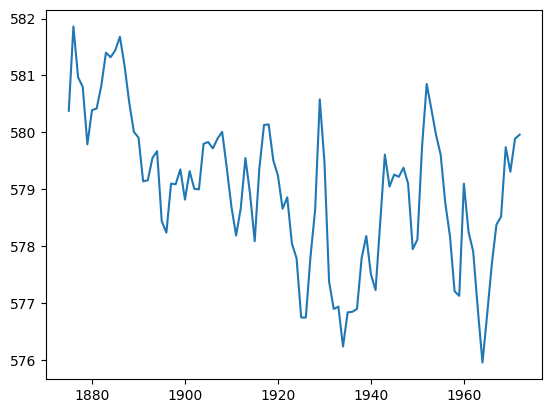

In [6]:
## Generate some visual aids (such as tables or graphs) to present your data to others.

print(np.mean(dataset['level']))

plt.plot(dataset['year'], dataset['level'])

<Axes: >

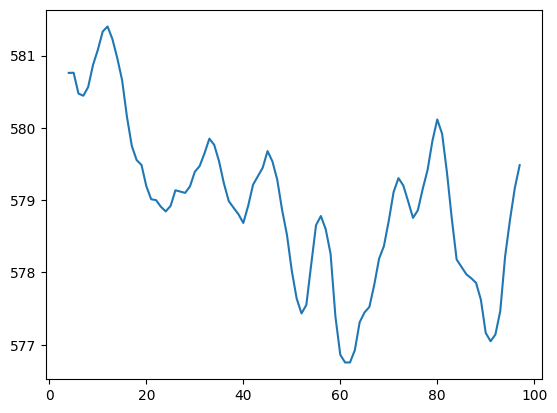

In [7]:
dataset['level'].rolling(window=5).mean().plot()

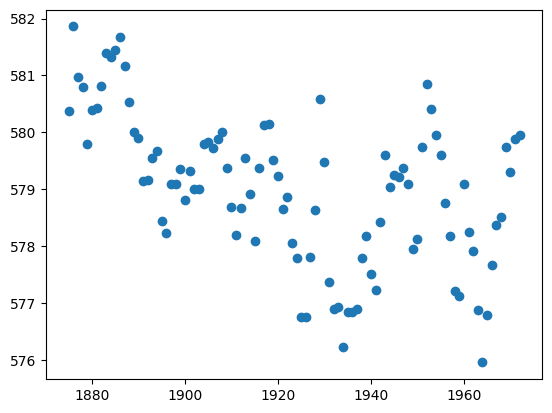

In [8]:
plt.scatter(dataset['year'], dataset['level'])